In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import requests

In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [3]:
# Points

In [ ]:
if result > 120000000:
    ch.set_points(20)
elif result > 119000000:
    ch.set_points(15)
elif result > 118000000:
    ch.set_points(10)
elif result > 110000000:
    ch.set_points(5)
elif result > 99100000:
    ch.set_points(1)

In [30]:
URL_BEGIN_DATA = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/begin'
URL_TASK_DATA_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/data'
URL_TASK_RESULT_POST = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result/'
URL_TASK_RESULT_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/result'
URL_LMS_TASK_RESULT_GET = 'https://lab.karpov.courses/hardml-api/project-1/task/{uuid}/lms_result'

In [4]:
# local URL's, same as lab.carpov
URL_BEGIN_DATA = 'http://127.0.0.1:5000/task/{uuid}/begin'
URL_TASK_DATA_GET = 'http://127.0.0.1:5000/task/{uuid}/data'

URL_TASK_RESULT_POST = 'http://127.0.0.1:5000/task/{uuid}/result/'

URL_TASK_RESULT_GET = 'http://127.0.0.1:5000/task/{uuid}/result'

# URL_LMS_TASK_RESULT_GET = 'http://127.0.0.1:5000/task/{uuid}/lms_result'

# Part 1 easy way to start

In [26]:
UUID = '100'

In [6]:
req = requests.post(URL_BEGIN_DATA.format(uuid=UUID))

In [7]:
last_price = pd.read_csv('latest_prices.csv')

In [8]:
last_price

SKU   price
0    16019  1144.0
1    39544  3244.0
2    85915  4510.0
3    30482  4155.0
4    76988   840.0
..     ...     ...
995  21070   570.0
996  84184  2073.0
997  24641  3675.0
998  91775  1355.0
999  16663  2240.0

[1000 rows x 2 columns]

In [9]:
try: 
    for i in range(30):
        response = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
#         print(response.json())
        df = pd.read_json(response.json())
        
        df = df.merge(last_price, how='left', on='SKU')
        
        response = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                 data=df.to_json(orient='records'))
        
#         print(response.json())
except Exception as e:
    response = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))

In [10]:
response = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))

In [11]:
response.json()

{'uuid': '100', 'result': 99106937}

In [11]:
df

dates    SKU  user_id   price
0     2019-12-30  42231    11302  1213.0
1     2019-12-30  35522    34961  3975.0
2     2019-12-30  66695    21247  1364.0
3     2019-12-30  59010    45509  1144.0
4     2019-12-30  52820    37947  2635.0
...          ...    ...      ...     ...
9570  2019-12-30  26819    91711  1431.0
9571  2019-12-30  26819    17921  1431.0
9572  2019-12-30  88782    37579  2613.0
9573  2019-12-30  86653    33756  1168.0
9574  2019-12-30  91775    45703  1355.0

[9575 rows x 4 columns]

# Part 2 Work with transactions

In [12]:
transactions = pd.read_csv('./full_data/transactions.csv')

In [13]:
transactions.dates = pd.to_datetime(transactions.dates)

## Get latest_price for part 1

In [14]:
last_price = transactions.sort_values(['dates', 'SKU']).groupby('SKU').price.tail(1).reset_index()\
.rename(columns={'index':'SKU'})

In [15]:
last_price

SKU   price
0     314622  4462.0
1     464955  3024.0
2     989319  1065.0
3    1215194  2081.0
4    1285911  1193.0
..       ...     ...
995   681981  1368.0
996   688929  1891.0
997   921272   448.0
998   439526  3307.0
999   748585   813.0

[1000 rows x 2 columns]

 ## Transactions Sample Analysis 

In [16]:
sku_sample = np.random.choice(transactions.SKU.unique(), 25)

In [17]:
sample_df = transactions[transactions.SKU.isin(sku_sample)]

In [18]:
sample_df_agg = sample_df.groupby(['dates','SKU','price']).user.count().reset_index().rename(columns={'user': 'num_purchases'})

In [19]:
sample_df_agg

dates    SKU   price  num_purchases
0    2018-01-03  41262  3473.0              6
1    2018-01-04  41262  3473.0              8
2    2018-01-05  41262  3473.0              7
3    2018-01-05  46795  2991.0              6
4    2018-01-06  41262  3473.0              6
...         ...    ...     ...            ...
7821 2019-11-30  73555  2216.0              5
7822 2019-11-30  77573  3036.0              5
7823 2019-11-30  81681  1629.0              2
7824 2019-11-30  87669  1688.0              3
7825 2019-11-30  87831  2707.0              3

[7826 rows x 4 columns]

In [20]:
pivot_t = sample_df_agg.pivot_table(index='dates',columns='SKU', values='price')

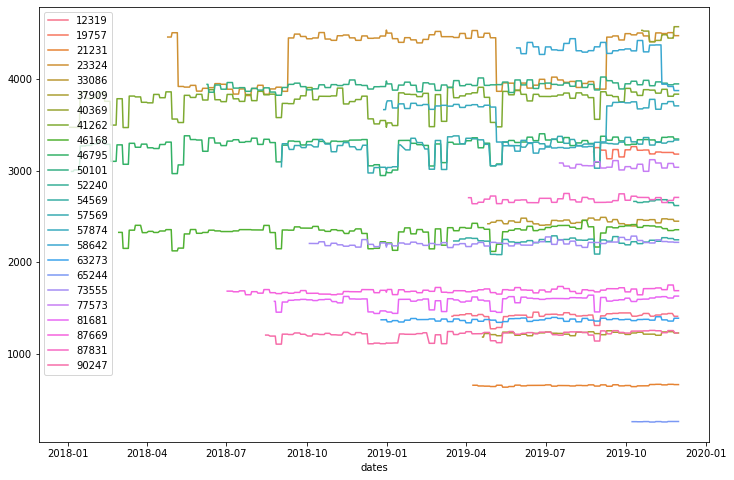

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(data = pivot_t, dashes=False)

## Lazy way to group timeserieses

In [22]:
pivot_t.corr()

SKU       12319     19757     21231     23324     33086     37909     40369  \
SKU                                                                           
12319  1.000000 -0.440216  0.239686  0.184883 -0.089582  0.328854 -0.026402   
19757 -0.440216  1.000000 -0.146455 -0.287767 -0.032534 -0.377748  0.193276   
21231  0.239686 -0.146455  1.000000  0.089144  0.299359 -0.045801 -0.562596   
23324  0.184883 -0.287767  0.089144  1.000000 -0.072985  0.189142  0.206446   
33086 -0.089582 -0.032534  0.299359 -0.072985  1.000000  0.038847  0.031125   
37909  0.328854 -0.377748 -0.045801  0.189142  0.038847  1.000000  0.295860   
40369 -0.026402  0.193276 -0.562596  0.206446  0.031125  0.295860  1.000000   
41262  0.898310 -0.119594  0.160391 -0.049459 -0.058659  0.234453 -0.045848   
46168  0.903275 -0.298529  0.192609 -0.051228 -0.115548  0.233958 -0.193262   
46795  0.873631 -0.382340  0.316648 -0.150046  0.048374  0.352036  0.254078   
50101  0.166744  0.095955  0.161884  0.209156  0.011653 -0.166592  0.330553   
52240  0.277724  0.150316  0.064134  0.001012 -0.031873 -0.316594 -0.691027   
54569  0.861298 -0.293155  0.241902  0.126126  0.084535  0.329191 -0.137658   
57569  0.922656 -0.292682  0.136658 -0.065789 -0.174281  0.226198  0.673049   
57874  0.095556 -0.341331  0.119593  0.973668 -0.028573  0.145839 -0.424475   
58642 -0.097584  0.239586 -0.381485 -0.412795 -0.194571 -0.447973 -0.435092   
63273  0.298329 -0.126595  0.209070 -0.038568  0.052200 -0.023043  0.108446   
65244  0.149067  0.162532  0.018287  0.539418 -0.317927 -0.020372  0.410287   
73555  0.087543  0.095777  0.094674  0.016229 -0.501412  0.112110 -0.207214   
77573 -0.403078  0.143007  0.435837 -0.073944  0.282776  0.068977 -0.779674   
81681  0.865834 -0.340094  0.307980 -0.067736  0.075495  0.290223  0.233566   
87669  0.453200 -0.353411  0.176501  0.052844  0.108703  0.104158 -0.559344   
87831  0.125577 -0.080301 -0.090504  0.230091 -0.251787  0.050534  0.316140   
90247  0.876609 -0.191184  0.216922 -0.003645 -0.082988  0.304593 -0.600043   

SKU       41262     46168     46795  ...     57874     58642     63273  \
SKU                                  ...                                 
12319  0.898310  0.903275  0.873631  ...  0.095556 -0.097584  0.298329   
19757 -0.119594 -0.298529 -0.382340  ... -0.341331  0.239586 -0.126595   
21231  0.160391  0.192609  0.316648  ...  0.119593 -0.381485  0.209070   
23324 -0.049459 -0.051228 -0.150046  ...  0.973668 -0.412795 -0.038568   
33086 -0.058659 -0.115548  0.048374  ... -0.028573 -0.194571  0.052200   
37909  0.234453  0.233958  0.352036  ...  0.145839 -0.447973 -0.023043   
40369 -0.045848 -0.193262  0.254078  ... -0.424475 -0.435092  0.108446   
41262  1.000000  0.892936  0.892092  ... -0.045627 -0.150085  0.150324   
46168  0.892936  1.000000  0.883285  ... -0.114245  0.072817  0.171463   
46795  0.892092  0.883285  1.000000  ... -0.164601 -0.235671  0.195287   
50101  0.201664  0.250702  0.201706  ... -0.022731  0.032563  0.056721   
52240  0.537481  0.443270 -0.222034  ...  0.067398  0.386731  0.061836   
54569  0.806666  0.833739  0.873080  ...  0.039663 -0.245834  0.240844   
57569  0.915075  0.915048  0.897742  ... -0.063151 -0.109469  0.171197   
57874 -0.045627 -0.114245 -0.164601  ...  1.000000 -0.394941 -0.100666   
58642 -0.150085  0.072817 -0.235671  ... -0.394941  1.000000  0.046222   
63273  0.150324  0.171463  0.195287  ... -0.100666  0.046222  1.000000   
65244 -0.585826 -0.345426 -0.055672  ... -0.415727 -0.283485  0.274862   
73555  0.117735  0.159050  0.106028  ...  0.088231  0.009423  0.230144   
77573 -0.265520 -0.302046 -0.199671  ... -0.030302  0.103970 -0.056707   
81681  0.892512  0.909397  0.926626  ... -0.176921 -0.206888  0.261999   
87669  0.237047  0.284643  0.219557  ...  0.042078 -0.316558  0.210616   
87831  0.050222  0.145007  0.068704  ...  0.188696  0.078268  0.099817   
90247  0.898913  0.903485  0.930105  ... -0.055009 -0.053236  0.155068   

SKU       65244     

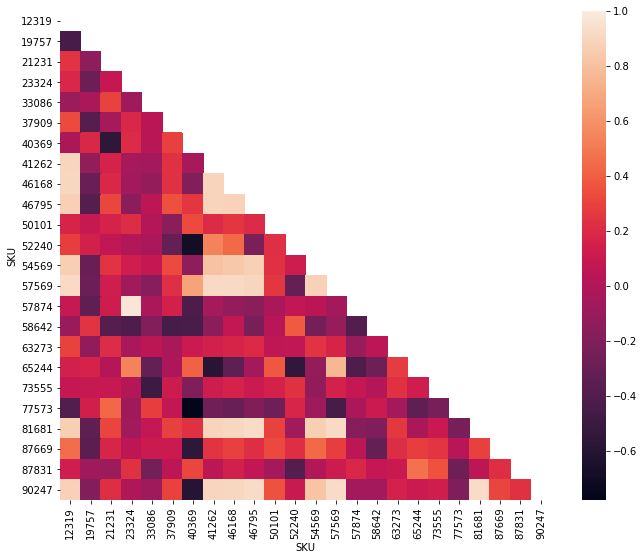

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(pivot_t.corr(), dtype=bool))
sns.heatmap(pivot_t.corr(), mask=mask)

In [24]:
pairs = pivot_t.corr().abs().unstack().sort_values()

In [25]:
pairs.index = pairs.index.set_names(['SKU_1', 'SKU_2'])

In [26]:
pairs = pairs.reset_index().rename(columns = {0:'correlation'})

In [27]:
high_corr_pairs = pairs[(pairs.correlation >= 0.78) & (pairs.correlation < 0.99)].reset_index(drop=True)

In [28]:
high_corr_pairs

SKU_1  SKU_2  correlation
0   41262  54569     0.806666
1   54569  41262     0.806666
2   54569  90247     0.814192
3   90247  54569     0.814192
4   46168  54569     0.833739
5   54569  46168     0.833739
6   12319  54569     0.861298
7   54569  12319     0.861298
8   54569  81681     0.862425
9   81681  54569     0.862425
10  81681  12319     0.865834
11  12319  81681     0.865834
12  54569  46795     0.873080
13  46795  54569     0.873080
14  46795  12319     0.873631
15  12319  46795     0.873631
16  54569  57569     0.875339
17  57569  54569     0.875339
18  90247  12319     0.876609
19  12319  90247     0.876609
20  46795  46168     0.883285
21  46168  46795     0.883285
22  46795  41262     0.892092
23  41262  46795     0.892092
24  41262  81681     0.892512
25  81681  41262     0.892512
26  46168  41262     0.892936
27  41262  46168     0.892936
28  57569  46795     0.897742
29  46795  57569     0.897742
30  12319  41262     0.898310
31  41262  12319     0.898310
32  90247  41262     0.898913
33  41262  90247     0.898913
34  12319  46168     0.903275
35  46168  12319     0.903275
36  90247  46168     0.903485
37  46168  90247     0.903485
38  81681  46168     0.909397
39  46168  81681     0.909397
40  46168  57569     0.915048
41  57569  46168     0.915048
42  57569  41262     0.915075
43  41262  57569     0.915075
44  57569  81681     0.919100
45  81681  57569     0.919100
46  57569  12319     0.922656
47  12319  57569     0.922656
48  57569  90247     0.926563
49  90247  57569     0.926563
50  81681  46795     0.926626
51  46795  81681     0.926626
52  81681  90247     0.928420
53  90247  81681     0.928420
54  46795  90247     0.930105
55  90247  46795     0.930105
56  23324  57874     0.973668
57  57874  23324     0.973668

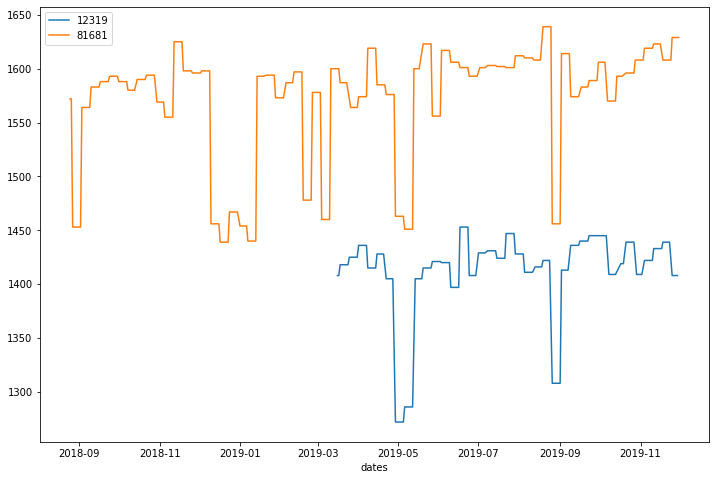

In [38]:
plt.figure(figsize=(12,8))
sns.lineplot(data = pivot_t[[12319, 81681]], dashes=False)

In [31]:
dd_high_corr_pairs = high_corr_pairs.sort_values(['SKU_1','SKU_2']).drop_duplicates(subset='correlation').reset_index(drop=True)

In [32]:
dd_high_corr_pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SKU_1        29 non-null     int64  
 1   SKU_2        29 non-null     int64  
 2   correlation  29 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 824.0 bytes


In [33]:
dd_high_corr_pairs

SKU_1  SKU_2  correlation
0   12319  41262     0.898310
1   12319  46168     0.903275
2   12319  46795     0.873631
3   12319  54569     0.861298
4   12319  57569     0.922656
5   12319  81681     0.865834
6   12319  90247     0.876609
7   23324  57874     0.973668
8   41262  46168     0.892936
9   41262  46795     0.892092
10  41262  54569     0.806666
11  41262  57569     0.915075
12  41262  81681     0.892512
13  41262  90247     0.898913
14  46168  46795     0.883285
15  46168  54569     0.833739
16  46168  57569     0.915048
17  46168  81681     0.909397
18  46168  90247     0.903485
19  46795  54569     0.873080
20  46795  57569     0.897742
21  46795  81681     0.926626
22  46795  90247     0.930105
23  54569  57569     0.875339
24  54569  81681     0.862425
25  54569  90247     0.814192
26  57569  81681     0.919100
27  57569  90247     0.926563
28  81681  90247     0.928420

In [39]:
chain = {}
for index, row in dd_high_corr_pairs.iterrows():
    sku_1 = int(row.SKU_1)
    sku_2 = int(row.SKU_2)
    if len([1 for sets in chain.values() if sku_2 in sets]) > 0:
        print(chain)
        continue
    if chain.get(sku_1):
        chain[sku_1].add(sku_2)
    else:
        chain[sku_1] = {sku_2}

{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54569, 46795, 41262, 81681, 46168}, 23324: {57874}}
{12319: {57569, 90247, 54

In [37]:
chain

{12319: {41262, 46168, 46795, 54569, 57569, 81681, 90247}, 23324: {57874}}

### For full transactions, it is better to combine chains of 2 or 3 to another group

# Part 3 Simple model creation

In [40]:
transactions['month'] = transactions.dates.dt.month
transactions['year'] = transactions.dates.dt.year

In [41]:
tr_agg = transactions.groupby(['SKU','year', 'month']).price.mean().reset_index()

In [42]:
tr_agg['prev_price'] = tr_agg.groupby('SKU').price.shift(1)

In [43]:
tr_agg['perc_diff'] = tr_agg['prev_price']/tr_agg['price']

In [44]:
tr_agg.perc_diff.describe()

count    10386.000000
mean         0.998628
std          0.023269
min          0.869826
25%          0.991930
50%          0.998206
75%          1.004325
max          1.157807
Name: perc_diff, dtype: float64

In [45]:
tr_agg['trend_coef'] = np.abs(1 - tr_agg['perc_diff'])

In [46]:
tr_agg.groupby('SKU').trend_coef.mean()

SKU
10060    0.021845
10121    0.010137
10216    0.027811
10230    0.002659
10290    0.006049
           ...   
99310    0.020035
99905    0.004275
99965    0.004668
99974    0.009326
99996    0.023010
Name: trend_coef, Length: 1000, dtype: float64

In [11]:
transactions_aggr = pd.read_csv('transactions_aggr_new.csv')

In [12]:
transactions_aggr.dates = pd.to_datetime(transactions_aggr.dates)

In [13]:
transactions_aggr.season.unique()

array([1, 3, 2, 0, 4])

In [14]:
transactions_aggr

dates    SKU  week_num  year  season  elastic   price  \
0      2018-11-09  16019        45  2018       1        1  1252.0   
1      2018-11-10  16019        45  2018       1        1  1252.0   
2      2018-11-11  16019        45  2018       1        1  1252.0   
3      2018-11-12  16019        46  2018       1        1  1170.0   
4      2018-11-13  16019        46  2018       1        1  1170.0   
...           ...    ...       ...   ...     ...      ...     ...   
329305 2019-04-17  16663        16  2019       0        1  2240.0   
329306 2019-04-18  16663        16  2019       0        1  2240.0   
329307 2019-04-19  16663        16  2019       0        1  2240.0   
329308 2019-04-20  16663        16  2019       0        1  2240.0   
329309 2019-04-21  16663        16  2019       0        1  2240.0   

        num_purchases  
0                   4  
1                   3  
2                   3  
3                   3  
4                   3  
...               ...  
329305              5  
329306              4  
329307              4  
329308              6  
329309              5  

[329310 rows x 8 columns]

In [51]:
import xgboost as xgb

In [52]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'min_child_weight':1,
    'silent': 1,
    'seed':0
}

In [19]:
transactions_aggr['week_day'] = transactions_aggr.dates.dt.weekday
transactions_aggr['week_num'] = transactions_aggr.dates.dt.week
transactions_aggr['year'] = transactions_aggr.dates.dt.year
transactions_aggr['month'] = transactions_aggr.dates.dt.month
transactions_aggr['dates_int'] = transactions_aggr.dates.astype(int)
transactions_aggr

/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/Users/sgafarov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """


dates    SKU  week_num  year  season  elastic   price  \
0      2018-11-09  16019        45  2018       1        1  1252.0   
1      2018-11-10  16019        45  2018       1        1  1252.0   
2      2018-11-11  16019        45  2018       1        1  1252.0   
3      2018-11-12  16019        46  2018       1        1  1170.0   
4      2018-11-13  16019        46  2018       1        1  1170.0   
...           ...    ...       ...   ...     ...      ...     ...   
329305 2019-04-17  16663        16  2019       0        1  2240.0   
329306 2019-04-18  16663        16  2019       0        1  2240.0   
329307 2019-04-19  16663        16  2019       0        1  2240.0   
329308 2019-04-20  16663        16  2019       0        1  2240.0   
329309 2019-04-21  16663        16  2019       0        1  2240.0   

        num_purchases  week_day  month            dates_int  
0                   4         4     11  1541721600000000000  
1                   3         5     11  1541808000000000000  
2                   3         6     11  1541894400000000000  
3                   3         0     11  1541980800000000000  
4                   3         1     11  1542067200000000000  
...               ...       ...    ...                  ...  
329305              5         2      4  1555459200000000000  
329306              4         3      4  1555545600000000000  
329307              4         4      4  1555632000000000000  
329308              6         5      4  1555718400000000000  
329309              5         6      4  1555804800000000000  

[329310 rows x 11 columns]

In [54]:
dummies = pd.get_dummies(df['SKU'])
df = pd.concat([df, pd.get_dummies(df.SKU)], axis=1)

In [55]:
model_dict = {}
dummy_sku_dicts = {}
for season in transactions_aggr.season.unique():
    df = transactions_aggr[transactions_aggr.season==season]\
    [['dates_int', 'SKU', 'week_num', 'year', 'elastic', 'week_day', 'month','price','num_purchases']]
    dummies = pd.get_dummies(df['SKU'])
    df = pd.concat([df, pd.get_dummies(df.SKU)], axis=1)
    a = [i for i in df.columns if i not in ['dates_int', 'SKU', 'week_num', 'year', 
                                      'elastic', 'week_day', 'month','price','num_purchases']]
    dummy_sku_dicts[season] = a
    xgb_train = xgb.DMatrix(df.drop(['SKU','num_purchases'], axis=1)
                        , df['num_purchases']
                        , feature_names = [str(i) for i in df.drop(['SKU','num_purchases'], axis=1).columns])
    model = xgb.train(params = xgb_params
                  , dtrain = xgb_train
                  , num_boost_round = 1000)
    model_dict[season] = model

[18:08:29] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:12:59] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:12:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above

In [56]:
model_dict

{1: <xgboost.core.Booster at 0x7fe1bcf8c3d0>,
 3: <xgboost.core.Booster at 0x7fe1bcf924d0>,
 2: <xgboost.core.Booster at 0x7fe1bcfa0f50>,
 0: <xgboost.core.Booster at 0x7fe1bcfad550>,
 4: <xgboost.core.Booster at 0x7fe1bcfcbed0>}

In [57]:
model_dict[0].feature_names

['dates_int',
 'week_num',
 'year',
 'elastic',
 'week_day',
 'month',
 'price',
 '10121',
 '10230',
 '10947',
 '10973',
 '11189',
 '11318',
 '11582',
 '11599',
 '11952',
 '12997',
 '13110',
 '13155',
 '13979',
 '14749',
 '15057',
 '15713',
 '15850',
 '15905',
 '16243',
 '16363',
 '16496',
 '16663',
 '16805',
 '17309',
 '17644',
 '17657',
 '17776',
 '18314',
 '18384',
 '18457',
 '18966',
 '19004',
 '19734',
 '20301',
 '20680',
 '21041',
 '21277',
 '21389',
 '21516',
 '21691',
 '21874',
 '21940',
 '21950',
 '22049',
 '22108',
 '22579',
 '22787',
 '23149',
 '23198',
 '23502',
 '24152',
 '24344',
 '24456',
 '24556',
 '24595',
 '24626',
 '25353',
 '25538',
 '26018',
 '26159',
 '26331',
 '26616',
 '26677',
 '26808',
 '27051',
 '27071',
 '27417',
 '28141',
 '28145',
 '28423',
 '28756',
 '29698',
 '29946',
 '30449',
 '30482',
 '30738',
 '31002',
 '31327',
 '31344',
 '31840',
 '32675',
 '32801',
 '32853',
 '32954',
 '33139',
 '33491',
 '33562',
 '34656',
 '34878',
 '35210',
 '35645',
 '35665',

### Get some information about user behavior

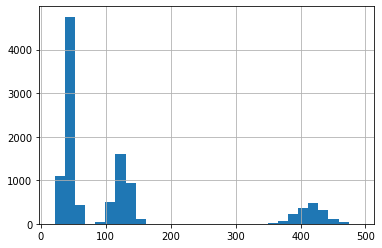

In [58]:
transactions.user.value_counts().hist(bins=30)

In [59]:
user_aggr = transactions.groupby('user').price.count().reset_index().rename(columns={'price':'num_purchases'})

In [60]:
user_aggr['freq_group'] = 0
user_aggr.loc[user_aggr.num_purchases >80, 'freq_group'] = 1
user_aggr.loc[user_aggr.num_purchases >200, 'freq_group'] = 2

In [61]:
user_aggr

user  num_purchases  freq_group
0      10002             41           0
1      10003            449           2
2      10006             37           0
3      10008             45           0
4      10009            132           1
...      ...            ...         ...
11057  49992             39           0
11058  49993            128           1
11059  49994             38           0
11060  49995             43           0
11061  49999            116           1

[11062 rows x 3 columns]

## Future improvment: Use RFM analysis to get more context 

# Part 4 How to get 10-15

In [5]:
whole_sale_price = pd.read_csv('./full_data/wholesale_trade_table.csv')

In [6]:
sales_plan = pd.read_csv('./full_data/sales_plan.csv')

In [7]:
sales_plan[(sales_plan.year == 2019) & (sales_plan.month == 12)].back_bonus.sum()

98160000

In [8]:
whole_sale_fin = whole_sale_price[(whole_sale_price.year == 2019) & (whole_sale_price.month==12)] 

In [9]:
whole_sale_fin

SKU  year  week_num  month  cost_price
0      10060  2019         1     12      2211.0
41     10060  2019        48     12      2454.0
42     10060  2019        49     12      2383.0
43     10060  2019        50     12      2292.0
44     10060  2019        51     12      2272.0
...      ...   ...       ...    ...         ...
61247  99996  2019        48     12       719.0
61248  99996  2019        49     12       680.0
61249  99996  2019        50     12       697.0
61250  99996  2019        51     12       691.0
61251  99996  2019        52     12       692.0

[4917 rows x 5 columns]

In [20]:
transactions_aggr['week_num'] = pd.to_datetime(transactions_aggr.dates).dt.isocalendar().week 

In [21]:
new_agg =transactions_aggr.merge(whole_sale_price, how='left', on=['year', 'SKU', 'week_num', 'month'])

In [22]:
new_agg = new_agg[new_agg.year==2019]

In [23]:
new_agg['margin_perc'] = (new_agg.price - new_agg.cost_price)/new_agg.cost_price

In [24]:
new_agg.margin_perc.describe()

count    232935.000000
mean          0.148732
std           0.017552
min           0.056000
25%           0.139827
50%           0.149977
75%           0.160137
max           0.172269
Name: margin_perc, dtype: float64

In [39]:
req = requests.post(URL_BEGIN_DATA.format(uuid=UUID))

In [40]:
try: 
    for i in range(30):
        response = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
#         print(response.json())
        df = pd.read_json(response.json())
        df.dates = pd.to_datetime(df.dates)
        df['year'] = df.dates.dt.year
        df['week_num'] = df.dates.dt.isocalendar().week
        df['month'] = df.dates.dt.month
        
        df = df.merge(whole_sale_fin, how='left', on=['SKU','year', 'week_num', 'month'])
        
        df['price'] = df.cost_price * 1.18
        
        df.dates = df.dates.dt.strftime('%Y-%m-%d')
        
        response = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                 data=df[['dates', 'SKU', 'user_id', 'price']].to_json(orient='records'))
        
#         print(response.json())
except Exception as e:
    response = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))

In [41]:
response = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))

In [42]:
response.json()

{'uuid': '100', 'result': 112649216}

## Future improvment: Work with margins for every group of sku and every group of users. Try to beat 120 000 000 score

In [104]:
user_aggr = user_aggr.merge(
    transactions.groupby('user').price.sum().reset_index().rename(columns={'price':'sum_price'}),
    how='left', on='user')


In [107]:
user_aggr['monetary'] = 0
user_aggr.loc[user_aggr.sum_price >190000, 'monetary'] = 1
user_aggr.loc[user_aggr.sum_price >400000, 'monetary'] = 2

In [94]:
sku_aggr = transactions_aggr[['SKU','season', 'elastic']].drop_duplicates().reset_index(drop=True)

In [109]:
from space_bandits import LinearBandits

num_actions = 10
num_features = 6

linear_model = LinearBandits(num_actions, num_features, initial_pulls=100)

In [121]:
req = requests.post(URL_BEGIN_DATA.format(uuid=UUID))

In [122]:
try: 
    for i in range(30):
        response = requests.get(URL_TASK_DATA_GET.format(uuid=UUID))
#         print(response.json())
        df = pd.read_json(response.json())
        df.dates = pd.to_datetime(df.dates)
        df['year'] = df.dates.dt.year
        df['week_num'] = df.dates.dt.isocalendar().week
        df['month'] = df.dates.dt.month
        
        df = df.merge(whole_sale_fin, how='left', on=['SKU','year', 'week_num', 'month'])
        
        
        if i == 0: 
            df['random_choice'] = np.random.choice(range(10,20,1), size=df.shape[0])
            
            df['price'] = df.cost_price * (1 + 0.01*df['random_choice'])
        # Else Use Linear Bandit
        else: 
            # add user and item context
            break
        
        
        df.dates = df.dates.dt.strftime('%Y-%m-%d')        
        response = requests.post(URL_TASK_RESULT_POST.format(uuid=UUID),
                                 data=df[['dates', 'SKU', 'user_id', 'price']].to_json(orient='records'))
        
        # Get Feedback and train linear bandit
        

except Exception as e:
    response = requests.get(URL_LMS_TASK_RESULT_GET.format(uuid=UUID))

# 01.11 Leader board

# Some rewards